<a href="https://colab.research.google.com/github/Vngel0/Python_UC/blob/main/Clase_7_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering

En esta clase, revisaremos modelos de clustering los cuales pertenecen a una clase de modelos llamados no-supervisados.  El nombre viene por el hecho que su aprendizaje no puede ser supervisado dado que la variable target que se busca no se conoce o "no existe". Esta clase de algoritmos es muy popular, pues permite trabajar tanto con datos comunmente utilizados, como las tablas que hemos venido trabajando, pero también nos permite flexibilidad para agrupar datos no tan intuitivos, como un sistema de recomendador de peliculas, agrupación de colores en una imagen, etc.

Principalmente veremos 3 modelos que son:
- K-means
- K-modes
- K-prototypes

Los dos primeros son muy similares con la diferencia que uno se basa en medias (datos numericos) y el otro en modas (datos categóricos), mientras que el tercero es una mezcla de ambos.

## K-means

La traducción literal es K medias, dado que el algoritmo se le entregan como input una cierta cantidad de centros (K) y utilizando distancia entre las observaciones (aquí la importancia de que sean numéricas) las agrupa según a que centro esta mas cerca.

Generemos un conjunto de datos artificiales, en donde no tendremos la variable target `y` como soliamos tenerla.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


array([[-2.35572313,  1.93221634],
       [-2.44896628,  1.62828913],
       [-1.25934867,  0.20734201],
       ...,
       [-1.48137621,  2.92599595],
       [ 2.24424702,  0.96479988],
       [-2.07136364,  2.93438995]])

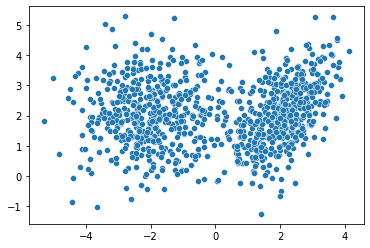

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
import seaborn as sb

X = make_classification(
    n_samples=1000,
    n_features=2, 
    n_redundant=0, 
    class_sep=2, 
    n_clusters_per_class=1,
    random_state=13)

display(X[0])
sb.scatterplot(x=X[0][:, 0], y=X[0][:, 1])

Podemos observar que esta información artificial es fácilmente dividida en dos grupos. Generaremos un algoritmo de k-means que agrupe dicha data y nos muestre sus resultados. Para esto  Utilizaremos la función `KMeans` de la librería `sklearn.cluster`.

Nota: Observar que en ningún momento se le entrega información de alguna variable `y`, más que la que creamos artificialmente con los klusters

<AxesSubplot:>

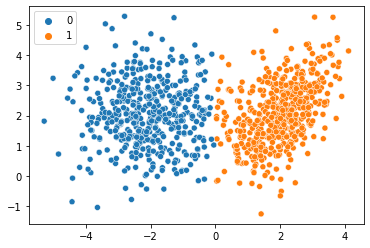

In [ ]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters =2, random_state= 10)
kmeans_model.fit(X[0])
y_label = kmeans_model.labels_
#display(kmeans_model.cluster_centers_)

sb.scatterplot(x=X[0][:, 0], y=X[0][:, 1], hue=y_label)

Claramente la clusterización utilizando K-means depende de la cantidad de clusters asociados. Nosotros creemos que en este caso con 2 centroides tenemos una buena segregación, pero en general (modelo no supervisado) no se sabe, por ello necesitamos algún método para detectar la cantidad de clusters "óptimo" para el modelo. 

Para ello introduciremos el gráfico de codo (Elbow), lo cual nos ayudará a identificar dicho número


In [ ]:
# Ajustaremos un Kmeans para cada valor de k en {1,2,...,9,10}. Luego compararemos la suma de las 
# distancias al cuadrado al centro del cluster
sumas = []
for k in range(1,10):
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(X[0])
    sumas.append(kmeans_model.inertia_)

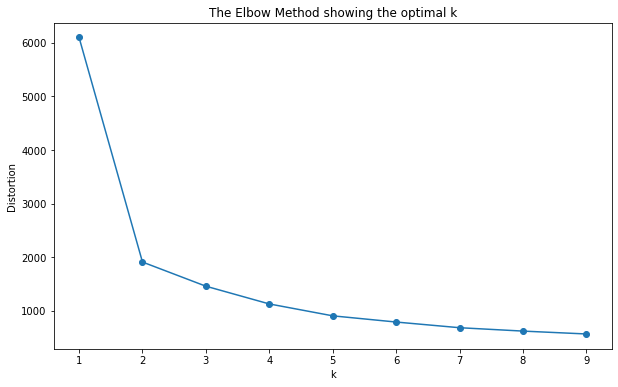

In [ ]:
# Ahora construimos el gráfico
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (10,6))
ax.plot(range(1,10),sumas,marker = 'o',linestyle = 'solid')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Como el "Quiebre" del codo se produce en el número 2, se toma como suficiente número de clusters para explicar la mayor cantidad de variabilidad posible, con el menor número de clusters. Obviamente entre más cluster, más fina es la agrupación, pero menos interpretación tiene.

A continuación realizaremos un análisis de imagenes con metodos de k-means. Si lo pensamos de la siguiente forma, una imagen tiene tres dimensiones: la coordenada X, la coordenada Y, y el valor RGB del pixel en dicha coordenada. Utilizaremos la función `io` de la librería `skimage` para visualizar nuestras imagenes.

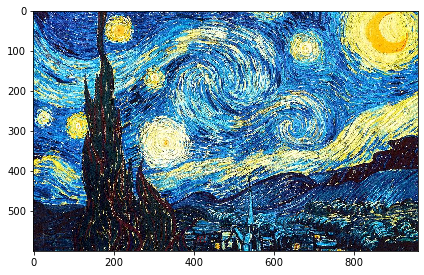

In [ ]:
from skimage import io
foto = io.imread("noche_estrellada.jpg")
io.imshow(foto);

Visualizemos las 3 dimensiones de la imagen, que mencionamos anteriormente

In [ ]:
foto.shape

(600, 960, 3)

In [ ]:
#Podemos rescatar los colores RGB del primer pixel
foto[0][0]

array([  0,  32, 102], dtype=uint8)

Como la imagen tiene 3 dimensiones y los algoritmos solo trabajan en 2 (fila columna) pasaremos las 3 dimensiones a 2, donde las primeras 2 se juntarán en una siendo la multiplicacion de esta

In [ ]:
alto, ancho, rgb = foto.shape
foto_reshaped = foto.reshape(alto * ancho, rgb)

Lo interesante es que ahora cada fila es el resultado de la multiplicación de las 2 dimensiones anteriores, es decir, la fila 1 corresponde al pixel en la posicion ancho 1 largo 1, y las columnas que aparecen son los canales R, G y B respectivamente.
Luego la fila 2 tiene el pixel en ancho 1 y largo 2, sus respectivos colores y así.

In [ ]:
foto_reshaped.shape

(576000, 3)

In [ ]:
foto_reshaped

array([[  0,  32, 102],
       [ 13,  60, 128],
       [ 46,  94, 158],
       ...,
       [ 17,   5,  15],
       [ 27,  15,  27],
       [ 27,  15,  27]], dtype=uint8)

Como ahora es una matriz de 2 dimensiones, se pueden utilizar los algoritmos, en este caso Kmeans. Supongamos que solo vemos 7 colores predominantes en la imagen, en ese caso realizaremos nuestro algoritmo con 7 centroides

In [ ]:
# instanciamos KMeans en un nuevo objeto
kmeans = KMeans(n_clusters=7, random_state=11238)
# obtenemos los resultados
fit_results = kmeans.fit_predict(foto_reshaped)

In [ ]:
kmeans

KMeans(n_clusters=7, random_state=11238)

Ahora extraeremos las etiquetas predichas con `labels_`

In [ ]:
#algoritmo clasico
kmeans.labels_

array([4, 4, 0, ..., 2, 2, 2], dtype=int32)

El array de arriba nos dice, el pixel uno pertenece al kluster 6, el pixeles 2 también, el 3 al cluster 5, y así.

Podemos observar los colores predominantes:

Como tenemos la lista de los valores k predichos en el objeto `kmeans.labels_`, podemos rescatar su frecuencia relativa:

In [ ]:
import pandas as pd
relativa = pd.DataFrame({'% relativo colores':pd.DataFrame({'K':kmeans.labels_}).K.value_counts('%')})
relativa

,% relativo colores
2,0.254530
4,0.183384
0,0.178047
3,0.123773
5,0.114783
1,0.078210
6,0.067274


In [ ]:
centros_kmean = kmeans.cluster_centers_
centros_kmean

array([[ 41.92066077, 123.13108136, 187.39399495],
       [228.22046894, 219.39739971, 105.45749528],
       [ 21.41924382,  24.8734888 ,  40.79365945],
       [218.06235517, 240.12257566, 213.05687803],
       [ 23.0530495 ,  68.5875052 , 120.70444663],
       [102.1161349 , 187.15442213, 226.07719591],
       [124.90852085, 145.68140999, 121.75147089]])

como los colores RGB no son decimales, hay que pasar estos numeros a enteros:

In [ ]:
colores_predichos = centros_kmean.astype(int)
print("Estos son los 7 colores RGB predichos por metodología K-means")
colores_predichos

Estos son los 7 colores RGB predichos por metodología K-means


array([[ 41, 123, 187],
       [228, 219, 105],
       [ 21,  24,  40],
       [218, 240, 213],
       [ 23,  68, 120],
       [102, 187, 226],
       [124, 145, 121]])

Ahora, es posible transformar un color *RGB* a un color *hexadecimal*, que es la notación que utiliza python. Desafortunadamente por tiempo no entraremos en detalle de como se procesa el cambio, pero es posible hacerlo con la siguiente función:

In [ ]:
def rgb_hex_it(rgb):
    tmp = list(map(lambda x: int(x), rgb))
    return'#%02x%02x%02x' % (tmp[0], tmp[1], tmp[2])

In [ ]:
colores_en_hexa = list(map(lambda x: rgb_hex_it(x), colores_predichos))
colores_en_hexa

['#297bbb', '#e4db69', '#151828', '#daf0d5', '#174478', '#66bbe2', '#7c9179']

Si ordenamos todo en un data frame:

In [ ]:
df_colores = pd.DataFrame(colores_predichos)
df_colores= pd.concat([df_colores, pd.DataFrame(np.arange(0,7)),pd.DataFrame(colores_en_hexa)], axis=1)
df_colores.columns = ['R', 'G', 'B', 'Kluster', 'Hexa']
df_colores

,R,G,B,Kluster,Hexa
0,41,123,187,0,#297bbb
1,228,219,105,1,#e4db69
2,21,24,40,2,#151828
3,218,240,213,3,#daf0d5
4,23,68,120,4,#174478
5,102,187,226,5,#66bbe2
6,124,145,121,6,#7c9179


Y podemos pegar todo en un único DF

In [ ]:
df_final = df_colores.join(relativa)
df_final=df_final.sort_values("% relativo colores")
df_final

,R,G,B,Kluster,Hexa,% relativo colores
6,124,145,121,6,#7c9179,0.067274
1,228,219,105,1,#e4db69,0.078210
5,102,187,226,5,#66bbe2,0.114783
3,218,240,213,3,#daf0d5,0.123773
0,41,123,187,0,#297bbb,0.178047
4,23,68,120,4,#174478,0.183384
2,21,24,40,2,#151828,0.254530


Y podemos visualizar los 7 colores predominantes de nuestra imagen:

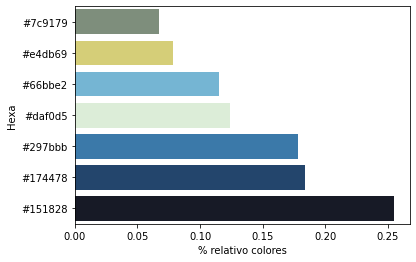

In [ ]:
import seaborn as sns;
palette = sns.color_palette(df_final['Hexa'])
sns.barplot(y="Hexa", x="% relativo colores", data=df_final,palette=palette); #con palette colocamos los colores del nombre

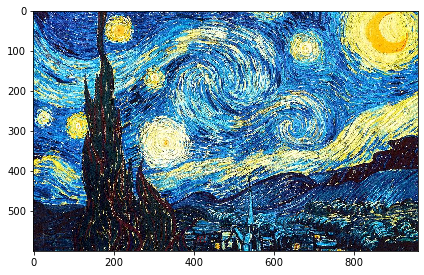

In [ ]:
io.imshow(foto);

## K-modes

K-modes es la versión análoga a K-means pero para datos categóricos. K-modes utiliza, como dice su nombre, K modas en vez de medias y medidas de disimilitud en vez de distancias. Ahora veremos un ejemplo donde podemos utilizar este tipo de modelos

In [ ]:
#pip install kmodes

In [ ]:
from kmodes.kmodes import KModes

bank = pd.read_csv('bank.csv')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown


En este caso solo utilizaremos las variables categóricas. Adicionalmente agregaremos la edad pues podemos categorizarla por rangos etarios

In [ ]:
bank_cust = bank[['age','job', 'marital', 'education', 'default', 'housing', 'loan','contact','month','poutcome']]

In [ ]:
bank_cust

,age,job,marital,education,default,housing,loan,contact,month,poutcome
0,30,unemployed,married,primary,no,no,no,cellular,oct,unknown
1,33,services,married,secondary,no,yes,yes,cellular,may,failure
2,35,management,single,tertiary,no,yes,no,cellular,apr,failure
3,30,management,married,tertiary,no,yes,yes,unknown,jun,unknown
4,59,blue-collar,married,secondary,no,yes,no,unknown,may,unknown
...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,yes,no,cellular,jul,unknown
4517,57,self-employed,married,tertiary,yes,yes,yes,unknown,may,unknown
4518,57,technician,married,secondary,no,no,no,cellular,aug,unknown
4519,28,blue-collar,married,secondary,no,no,no,cellular,feb,other


Utilizaremos la función `pd.cut` para generar recategorizar rápidamente valores que esten dentro de los límites definidos:

In [ ]:
# Categorizamos la variable edad

bank_cust['age_bin'] = pd.cut(bank_cust['age'], [0, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                              labels=['0-20', '20-30', '30-40', '40-50','50-60','60-70','70-80', '80-90','90-100'])
bank_cust  = bank_cust.drop('age',axis = 1)
bank_cust.head()

<ipython-input-27-da9de40eb79b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_cust['age_bin'] = pd.cut(bank_cust['age'], [0, 20, 30, 40, 50, 60, 70, 80, 90, 100],


,job,marital,education,default,housing,loan,contact,month,poutcome,age_bin
0,unemployed,married,primary,no,no,no,cellular,oct,unknown,20-30
1,services,married,secondary,no,yes,yes,cellular,may,failure,30-40
2,management,single,tertiary,no,yes,no,cellular,apr,failure,30-40
3,management,married,tertiary,no,yes,yes,unknown,jun,unknown,20-30
4,blue-collar,married,secondary,no,yes,no,unknown,may,unknown,50-60


`LabelEncoder` nos permite rápidamente transformar a números las categorías

In [ ]:
# Usando Encoder para las variables
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
bank_cust = bank_cust.apply(le.fit_transform)
bank_cust.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,age_bin
0,10,1,0,0,0,0,0,10,3,1
1,7,1,1,0,1,1,0,8,0,2
2,4,2,2,0,1,0,0,0,0,2
3,4,1,2,0,1,1,2,6,3,1
4,1,1,1,0,1,0,2,8,3,4


Realizamos el modelo:
- n_clusters: 2 Clusters inicialmente para ver como están quedando
- Init: es el método de inicialización. Por defecto 'Cao' es utilizado https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.474.8181&rep=rep1&type=pdf
- n_init: Numero de veces que el algoritmo k-modes correrá con diferentes semillas de centroides.

In [ ]:
kmodes_model = KModes(n_clusters=2, init = "Cao", n_init = 1)
fitClusters_cao = kmodes_model.fit_predict(bank_cust)

clusterCentroidsDf = pd.DataFrame(kmodes_model.cluster_centroids_)
clusterCentroidsDf.columns = bank_cust.columns
display(clusterCentroidsDf)

,job,marital,education,default,housing,loan,contact,month,poutcome,age_bin
0,1,1,1,0,1,0,0,8,3,2
1,4,2,2,0,0,0,0,1,3,4


Para elegir el valor de K, se puede aplicar el mismo método del K-means del elbow, pero utilizaremos el 'Clustering cost', definido como la suma de las distancias de todos los puntos a sus respectivos centroides, que por defecto es rescatar este valor con `fited_model.cost_`

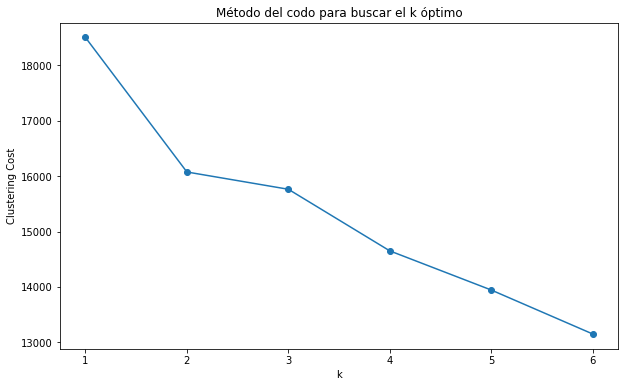

In [ ]:
cost = []
for num_clusters in range(1,7):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1)
    kmode.fit_predict(bank_cust)
    cost.append(kmode.cost_)

fig, ax = plt.subplots(figsize = (10,6))
ax.plot(range(1,7),cost,marker = 'o',linestyle = 'solid')
plt.xlabel('k')
plt.ylabel('Clustering Cost')
plt.title('Método del codo para buscar el k óptimo')
plt.show()

Naturalmente, entre más centroides, menor es la distancia de todos los puntos a dichos centroides, pero al igual que antes, perdemos generalización al usar muchos centroides. Podemos observar que de 2 a 3 centroides no hay mucha ganancia, por lo que si decidimos ir por más de 2, en este caso pareciera ser mínimo 4 centroides.

In [ ]:
kmodes_model = KModes(n_clusters=4, init = "Cao", n_init = 1)
fitClusters_cao = kmodes_model.fit_predict(bank_cust)

clusterCentroidsDf = pd.DataFrame(kmodes_model.cluster_centroids_)
clusterCentroidsDf.columns = bank_cust.columns
display(clusterCentroidsDf)

,job,marital,education,default,housing,loan,contact,month,poutcome,age_bin
0,1,1,1,0,1,0,0,8,3,2
1,9,2,2,0,0,0,2,6,3,4
2,1,1,0,0,0,1,0,5,3,3
3,4,1,2,0,0,0,0,1,3,3


Lo interesante de los algoritmos de agrupación, es la interpretabilidad de los cluster. Si asignamos los cluster calculados al set original, la idea es describir estos grupos que comportamiento tienen en comun, y calificarlos en "perfiles"

In [ ]:
bank['clusters'] = fitClusters_cao

In [ ]:
bank.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,clusters
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,2
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,1
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0


Por ejemplo, notemos que las personas del cluster 2 en su mayoria tienen educacion primaria, vs las del cluster 1 que su mayoria tiene educacion terciaria

In [ ]:
display(bank.query("clusters==2")['education'].value_counts("%"))
display(bank.query("clusters==1")['education'].value_counts("%"))

primary      0.509756
secondary    0.360976
tertiary     0.100000
unknown      0.029268
Name: education, dtype: float64

tertiary     0.486014
secondary    0.276224
primary      0.153846
unknown      0.083916
Name: education, dtype: float64

Tambien podemos ver que la mayoria de las personas del cluster 2 está casada, vs solo un 30% del cluster 1

In [ ]:
display(bank.query("clusters==2")['marital'].value_counts("%"))
display(bank.query("clusters==1")['marital'].value_counts("%"))

married     0.763415
divorced    0.121951
single      0.114634
Name: marital, dtype: float64

single      0.554196
married     0.307692
divorced    0.138112
Name: marital, dtype: float64

Así mismo, el objetivo es ir comparando los cluster para tener agrupaciones de personas con perfiles similares, a los cuales por ejemplo, se les podría ofrecer el mismo producto de venta

# K-prototypes

Finalmente el último modelo que veremos es K-prototypes, que es una mezcla de ambos. Permite recibir datos numéricos y categóricos. La lógica sigue siendo la misma, y lo podemos llamar con `from kmodes.kprototypes import KPrototypes`.

PAra ejemplificar, utilizaremos un set de datos de transfusión de sangre donde sus variables son:

 - R Recency -meses desde la última donación
 - F Frequency - Número total de donaciones
 - M Monetary - Total de sangre donada en c.c.
 - T Time - Meses desde la primera donación
 - Finalmente una variable vinaria representando si el paciente donó sangre en marzo del 2007 (1 si; 0 no)

In [ ]:
df.to_csv('transfusion.csv')

In [ ]:
df = pd.read_csv('transfusion.data', sep=",",engine = 'python')
df.head(3)

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1


Como calcularemos distancias, estandarizar la data ayudará a evitar sesgos en el algoritmo (solo en variables numéricas)

In [ ]:
columns_to_normalize     = ['Recency (months)','Frequency (times)','Monetary (c.c. blood)','Time (months)']
df[columns_to_normalize] = df[columns_to_normalize].apply(lambda x: (x - x.mean()) / np.std(x))
df.head(3)

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,-0.927899,7.623346,7.623346,2.615633,1
1,-1.175118,1.282738,1.282738,-0.257881,1
2,-1.051508,1.796842,1.796842,0.029471,1


In [ ]:
from kmodes.kprototypes import KPrototypes

In [ ]:
#modelo
kproto = KPrototypes(n_clusters=5, init='Cao')
clusters = kproto.fit_predict(df, categorical=[4]) # Nota, el 4 hace alusión a la columna en posición 4 (quinta) que es categorica

In [ ]:
df['cluster_id'] = clusters
df.head(5)

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007,cluster_id
0,-0.927899,7.623346,7.623346,2.615633,1,0
1,-1.175118,1.282738,1.282738,-0.257881,1,4
2,-1.051508,1.796842,1.796842,0.029471,1,2
3,-0.927899,2.482313,2.482313,0.439973,1,2
4,-1.051508,3.167784,3.167784,1.753579,0,2


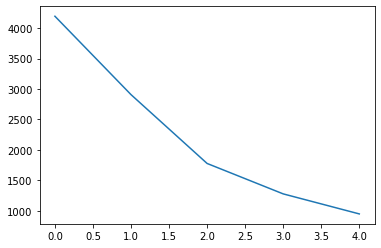

In [ ]:
cost = []
for num_clusters in list(range(1,6)):
    kproto = KPrototypes(n_clusters=num_clusters, init='Cao')
    kproto.fit_predict(df, categorical=[4])
    cost.append(kproto.cost_)
    
plt.plot(cost)

# Ejercicios 

En la base de datos _users.csv_ encontrará datos de famosos obtenidos midiendo su actividad en la red social Twitter. La idea es determinar, en base a los atributos, qué famosos son semejantes entre sí y qué famosos son distintos, también resulta interesante comprender cuántos tipos de perfiles se encontrará según la actividad en Twitter. 

Los atributos son los siguientes:

- usuario: Nombre en Twitter
- op: Openness to experience (grado de apertura mental a nuevas experiencias, curiosidad)
- co: Conscientiousness (grado de orden, prolijidad, organización)
- ex: Extraversion (grado de timidez ante el grupo social)
- ag: Agreeableness (grado de empatía con los demás)
- ne: Neuroticism (grado de neuroticismo, irritabilidad)
- Wordcount: Cantidad promedio de palabras usadas en sus tweets
- Categoria: Actividad laboral del usuario, dentro de los siguientes:
  1. Actor/actriz
  2. Cantante
  3. Modelo
  4. Tv, series
  5. Radio
  6. Tecnología
  7. Deportes
  8. Politica
  9. Escritor

a) Cargue la base de datos, observe las variables y su formato. Determine qué naturaleza posee cada variable (numéricas, categóricas, etcétera). Revise si existen casos faltantes en la base de datos y tome decisiones de qué hacer si existen casos faltantes.

b) ¿En qué paradigma de aprendizaje nos encontramos? ¿Supervisado o No Supervisado? Explique por qué no tendría sentido en este caso obtener una muestra de entrenamiento y prueba para medir el error de predicción. Argumente.

c) ¿Existe algún atributo que no se deba utilizar al realizar la segmentación? ¿Qué ocurre con la variable usuario? Una opción es eliminarla, pero sin duda sería bueno mantenerla como índice para después comparar qué famosos quedaron en los mismos grupos. Para esto, puede utilizar data.set_index('usuario').

d) Según el tipo de variables que tiene la base de datos se debe utilizar K-Means, K-Modes o K-Prototype, en este caso, ¿qué método de segmentación debería utilizar?

e) Prepare la base de datos (estandarice las variables cuantitativas y realice la modificación necesaria en las variables categóricas). 

f) Determine el número de grupos óptimo según el criterio de Elbow, pruebe hasta 15 grupos. Obtenga un gráfico de codo y comente los resultados. Recuerde la interpretación en el contexto, ¿le hace sentido que existan $k$ perfiles de usuarios en Twitter? (Considere que tiene 140 famosos en la base de datos). ¿Qué podría ocurrir si toma un $k$ muy grande?

g) Utilice el número de clúster propuesto, ¿cuántos famosos quedaron en cada grupo? ¿Existe algún grupo muy pequeño o muy grande?

h) Obtenga estadísticas de las variables numéricas para cada clúster, ¿cómo describiría cada clúster? ¿Qué famosos fueron clasificados como similares según la segmentación obtenida?